### MFC vs MFCC visualization difference

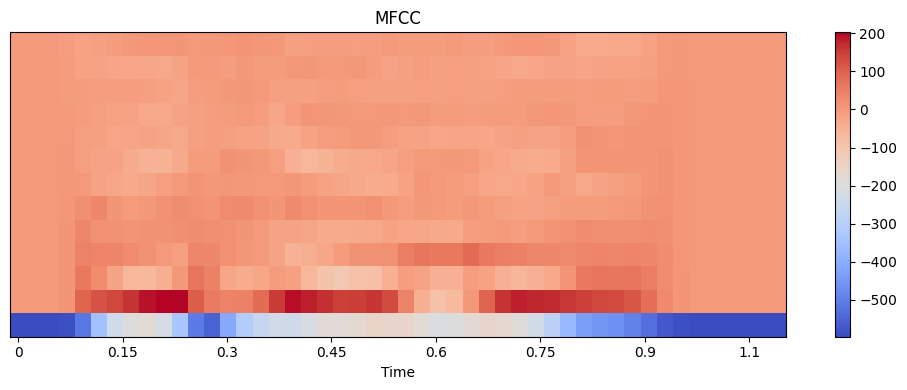

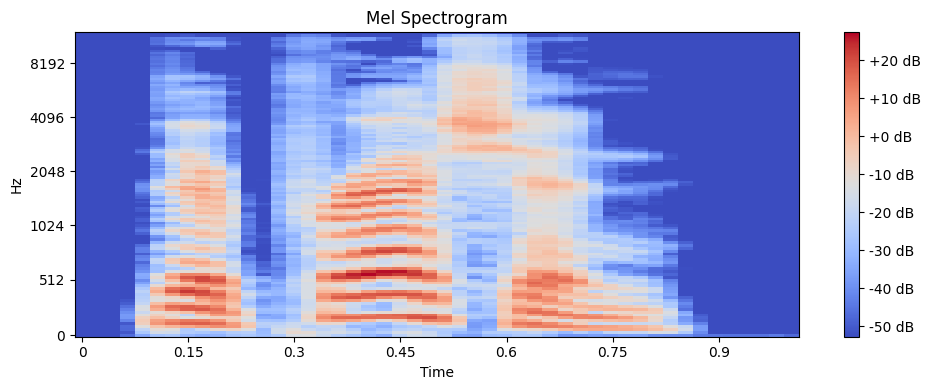

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_path = 'depression_test.mp3'
y, sr = librosa.load(audio_path, sr=None)  # sr (sample rate) None uses the original SR of the file

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust n_mfcc depending on your requirements

# Plotting the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


# -------------------------------


# Get Mel spectrogram
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to log scale (dB)
log_mel_spect = librosa.power_to_db(mel_spect)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spect, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('MCC - ')
plt.tight_layout()
plt.show()

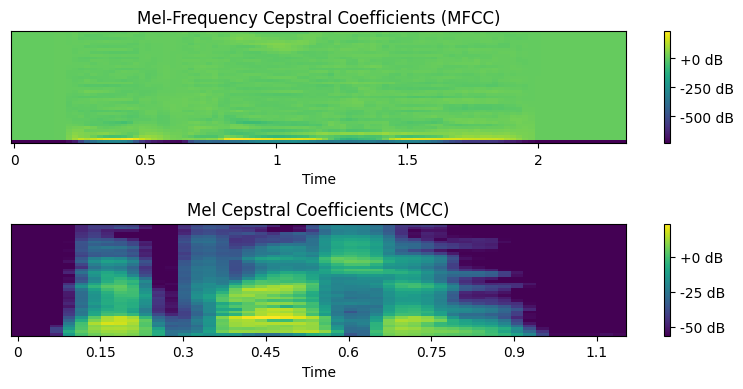

In [16]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def extract_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    mfccs = librosa.feature.mfcc(
        y=y,
        sr=sr,
        n_mfcc=40,  # 40 MFCC features
        hop_length=int(sr * 0.010),  # 10ms stride
        n_fft=int(sr * 0.025)  # 25ms window
    )
    
    # Extract MCCs (Mel Cepstral Coefficients)
    # First get mel spectrogram
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
    # Convert to log scale (this is our MCC representation)
    mccs = librosa.power_to_db(mel_spect)
    
    return mfccs, mccs, sr

def plot_comparison(audio_path):
    # Get features
    mfccs, mccs, sr = extract_features(audio_path)
    
    # Create subplot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4))
    
    # Plot MFCC
    img1 = librosa.display.specshow(mfccs, x_axis='time', ax=ax1, 
                                  cmap='viridis')
    ax1.set_title('Mel-Frequency Cepstral Coefficients (MFCC)')
    fig.colorbar(img1, ax=ax1, format='%+2.0f dB')
    
    # Plot MCC
    img2 = librosa.display.specshow(mccs, x_axis='time', ax=ax2,
                                  cmap='viridis')
    ax2.set_title('Mel Cepstral Coefficients (MCC)')
    fig.colorbar(img2, ax=ax2, format='%+2.0f dB')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

    return mfccs, mccs, sr

# Usage
audio_path = 'depression_test.mp3'
mfccs, mccs, sr = plot_comparison(audio_path)

In [17]:
mfccs.shape

(40, 101)

In [18]:
mccs.shape

(40, 48)